<a href="https://colab.research.google.com/github/FakhriFaishalRochdiana/SDG-16---Crime-Rate/blob/main/Kelompok_4_Visualisasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peace, Justice, and Strong Institution
Ketua Proyek : Fakhri Faishal Rochdiana - 1197050040

Anggota : 


*   Aziz Nuzul Praramadhana - 1197050024
*   Laela Chintia Alviani - 1197050060
*   Nisairrizqy Nabilah Faizah - 1197050096
*   Hanif Royyan Ramadhan - 1197050046

# Business Understanding
# A. Objektif Bisnis

*   Latar Belakang Masalah
>Kedamaian merupakan sebuah hal yang seringkali dikejar dalam sebuah komunitas atau negara. Kedamaian ini dapat dicapai melalui berbagai macam cara, dan telah menjadi salah satu tujuan yang terdapat pada sebuah rencana bernama *Sustainable Development Goals* atau biasa disingkat menjadi SDGs. Kedamaian merupakan salah satu tujuan yang diincar pada program ini, spesifiknya terdapat pada tujuan ke 16, yaitu *Peace, Justice, and Strong Institution*. Salah satu hal yang mempengaruhi tingkat kedamaian pada sebuah negara adalah tingkat kejahatan yang terjadi pada negara tersebut. Kejahatan dapat didorong oleh berbagai macam hal, salah satunya karena tidak memiliki pekerjaan. 

>United States of America(USA), atau biasa disingkat menjadi United States(US), adalah sebuah negara adidaya yang memiliki angkata militer yang kuat dan memiliki ekonomi yang kuat. Meskipun begitu, negara ini pun memiliki permasalahan seperti kejahatan yang kerap terjadi sepanjang tahun. Untuk dapat mengatasi permasalahan ini, pertama kita perlu untuk mencari penyebab dan hal yang berhubungan yang menyebabkan kejahatan kerap terjadi sebelum membuat sebuah solusi.

*   Identifikasi Masalah

>*   Bagaimana prediksi tingkat kejahatan pada tiap state di USA pada tahun berikutnya?
>*   Bagaimana hubungan antara tingkat kejahatan dengan tingkat pengangguran di USA?


*   Metode/Pendekatan Penyelesaian Masalah

>Metode yang akan digunakan pada mini riset ini adalah regresi linier sederhana untuk memprediksi tingkat kejahatan pada tahun berikutnya berdasarkan jumlah pengangguran.

# B. Tujuan Teknis dan Kriteria Kesuksesan

*   Adapun Tujuan dari riset ini adalah :
>Dapat memberikan hasil prediksi tingkat kejahatan pada tiap state di USA pada tahun berikutnya berdasarkan tingkat pengangguran.
*   Kriteria Kesuksesan 
>Mampu membuktikan hubungan antara tingkat kejahatan dengan tingkat pengangguran

# C. Timelime Mini Riset

*   9-16 November 2022 - Fiksasi Tema dan Business Understanding
*   17-23 November 2022 - Data Understanding
*   24-30 November 2022 - Data Preparation
*   1-7 Desember 2022 - Modeling
*   8-14 Desember 2022 - Evaluasi Modeling
*   15-21 Desember 2022 - Penyelesaian Laporan

# Data understanding
> Untuk mendukung mini riset ini, kami menggunakan dataset yang didapatkan dari kaggle yang berjudul "*Crime Rate and Unemployment Rate by State*". Data yang akan kami gunakan meliputi : 

*   State : Negara Bagian
*   Unemployment : jumlah orang penggangguran dalam jangka waktu 1 tahun
*   Year : tahun
*   Population : jumlah populasi dalam jangka 1 tahun
*   Violent Total : Jumlah kasus kejahatan kekerasan
*   Murder : jumlah kasus kejahatan pembunuhan
*   Rape : jumlah kasus kejahatan pemerkosaan
*   Robbery : jumlah kasus kejahatan pencurian
*   Aggravated Assault : jumlah kasus penganiayaan berat
*   Property Total : jumlah kasus kejahatan perusakan property
*   Burglary : jumlah kasus kejahatan perampokan
*   Larceny Theft : jumlah kasus kejahatan pencurian property
*   Vehicle Theft : jumlah kasus kejahatan pencurian kendaraan bermotor
*   Crime Rate : tingkat kejahatan, jumlah semua kejatahan dalam satu tahun dibagi dengan jumlah populasi
*   Unemployment Rate : tingkat pengangguran, jemlah pengangguran dibagi dengan jumlah populasi













In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np


In [4]:
#Mengambil Data
path = ('gdrive/MyDrive/Tugas/Visdat/crimebystatecombinedwithunemployment.csv')
Raw = pd.read_csv(path)
Raw

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,WY,6.458,2010,564554,197.9,1.4,28.7,13.6,154.1,2456.6,381.0,1970.8,104.9
1985,WY,5.808,2011,567356,219.4,3.2,25.7,12.5,178.0,2269.8,328.5,1849.5,91.8
1986,WY,5.317,2012,576626,201.3,2.4,26.7,10.6,161.6,2293.0,368.5,1823.2,101.3
1987,WY,4.725,2013,583223,207.8,2.9,24.7,12.7,157.2,2196.2,335.4,1761.8,99.1


In [5]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               1989 non-null   object 
 1   unemployment        1989 non-null   float64
 2   year                1989 non-null   int64  
 3   Population          1989 non-null   int64  
 4   violent total       1989 non-null   float64
 5   Murder              1989 non-null   float64
 6   rape                1989 non-null   float64
 7   Robbery             1989 non-null   float64
 8   Aggravated assault  1989 non-null   float64
 9   property total      1989 non-null   float64
 10  Burglary            1989 non-null   float64
 11  Larceny theft       1989 non-null   float64
 12  vehicle theft       1989 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 202.1+ KB


In [6]:
#Cek Data Kosong
Raw.isnull()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,False,False,False,False,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False,False,False,False,False
1986,False,False,False,False,False,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Filter Data yang kosong
Filtered = Raw.dropna()
Filtered
#Hasil menunjukkan tidak adanya data yang kosong

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,WY,6.458,2010,564554,197.9,1.4,28.7,13.6,154.1,2456.6,381.0,1970.8,104.9
1985,WY,5.808,2011,567356,219.4,3.2,25.7,12.5,178.0,2269.8,328.5,1849.5,91.8
1986,WY,5.317,2012,576626,201.3,2.4,26.7,10.6,161.6,2293.0,368.5,1823.2,101.3
1987,WY,4.725,2013,583223,207.8,2.9,24.7,12.7,157.2,2196.2,335.4,1761.8,99.1


In [8]:
#Membuat List Unemployment Rate dan Crime Rate
#Unemployment Rate
a = Filtered['unemployment']
b = Filtered['Population']
unrate = []

index = a.index
count = len(index)

for i in range(0, count):
  current = index[i]
  rate = (a[current] / b[current]) * 100
  unrate.append(rate)

#Crime Rate
c = Filtered['violent total']
d = Filtered['Murder']
e = Filtered['rape']
f = Filtered['Robbery']
g = Filtered['Aggravated assault']
h = Filtered['property total']
j = Filtered['Burglary']
k = Filtered['Larceny theft']
l = Filtered['vehicle theft']
totalc = []
crate = []

for i in range(0, count):
  current = index[i]
  total = c[current] + d[current] + e[current] + f[current] + g[current] + h[current] + j[current] + k[current] + l[current]
  totalc.append(total)
  rate = total / b[current] * 100
  crate.append(rate)

print(unrate)
print(crate)


[0.00018575716234652115, 0.00019850948509485096, 0.0001704970603955104, 0.0001899177500663306, 0.00022962781492831996, 0.0002692032686414709, 0.0003575957392848085, 0.00034877494316746654, 0.0002758897243107769, 0.00022797811489679186, 0.0002393288921786331, 0.00019796718099436688, 0.00017465471286648898, 0.00017100534239922294, 0.00016747566628314155, 0.00017955490339936414, 0.00018295454545454547, 0.00017513732983042752, 0.00014735719364778382, 0.000140489066541265, 0.00012246665106482564, 0.00011558231072007409, 0.00010128676470588236, 0.00010831005647317924, 0.000103055924085359, 0.00011468115729287128, 0.00013172889033368938, 0.00013360048990546938, 0.00012558075297627267, 9.876158860169904e-05, 8.76924047027308e-05, 8.606586512832847e-05, 0.00012136682468521419, 0.0002343105582253136, 0.00022029501811864877, 0.0002007207377496753, 0.0001648563329574836, 0.0001492967722770147, 0.0001398736373765125, 0.0019916230366492146, 0.002426289926289926, 0.0026508684863523575, 0.002294827586

In [9]:
#DataFrame Jumlah
list1 = Filtered['state']
list2 = Filtered['year']
list3 = Filtered['unemployment']

TotalEC = pd.DataFrame(list(zip(list1, list2, a, totalc)),
                       columns = ['State', 'Year', 'Unemployment Total', 'Crime Total'])
TotalEC
TotalEC.to_csv('Total Unemployment & Crime.csv')

In [10]:
#Membuat DataFrame baru
list1 = Filtered['state']
list2 = Filtered['year']

Real = pd.DataFrame(list(zip(list1, list2, unrate, crate)),
                    columns = ['State', 'Year', 'Unemployment Rate', 'Crime Rate'])
Real

,State,Year,Unemployment Rate,Crime Rate
0,AL,1976,0.000186,0.207820
1,AL,1977,0.000199,0.201225
2,AL,1978,0.000170,0.210518
3,AL,1979,0.000190,0.225198
4,AL,1980,0.000230,0.255530
...,...,...,...,...
1984,WY,2010,0.001144,0.940388
1985,WY,2011,0.001024,0.877474
1986,WY,2012,0.000922,0.865136
1987,WY,2013,0.000810,0.822636


In [11]:
Real.to_csv('Hasil.csv')

Modeling

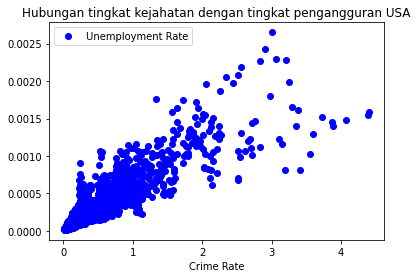

In [12]:
import matplotlib.pyplot as plt

Real.plot(x='Crime Rate',y="Unemployment Rate", style='o', color='blue')
plt.title('Hubungan tingkat kejahatan dengan tingkat pengangguran USA')
plt.show ()

In [19]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

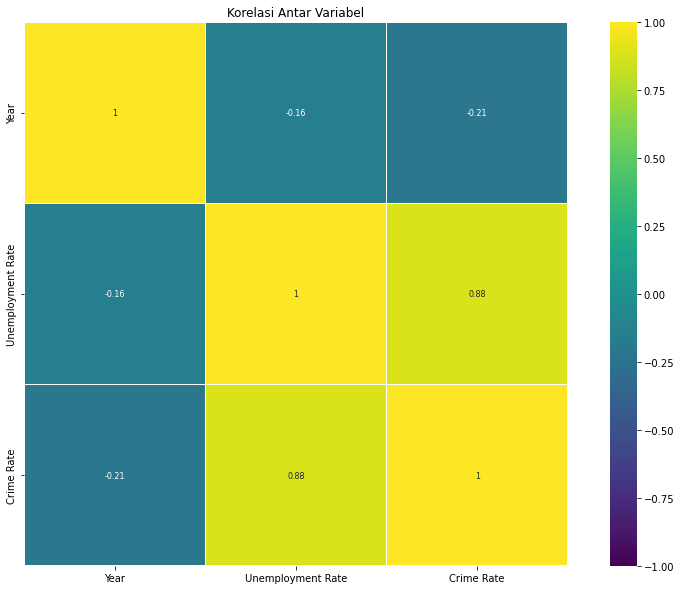

In [15]:
korelasi = Real.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(korelasi[(korelasi <= 0.5) | (korelasi >= -0.8)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, 
            annot=True, annot_kws={"size": 8}, square=True).set_title('Korelasi Antar Variabel')
plt.show()

In [16]:

data1 = pd.DataFrame(Real['Crime Rate'])
data2 = pd.DataFrame(Real['Unemployment Rate'])
x = data1.iloc[:, :1].values
y = data2.iloc[:, :1].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

# fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# memprediksi model dengan test set
y_pred = model.predict(x_test)

#Check Error
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.00010067116313548858
Mean Squared Error:  2.637015851009476e-08
Root Mean Squared Error:  0.00016238891129044113
R2 Score:  0.7890469833583593


In [25]:
#Persamaan Regresi
a=float(model.intercept_)
b=float(model.coef_)
print ('Y = ',a,'+',b,'X')

Y =  5.649424319438659e-05 + 0.0005235083615939424 X


Evaluation

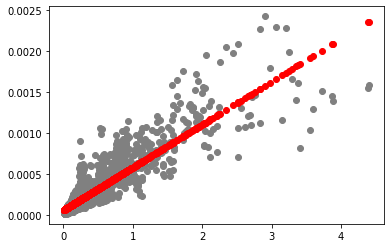

In [27]:
#Menampilkan Pengujian
plt.scatter(x_test, y_test, color = "gray")
plt.scatter(x_test, y_pred, color = "red")
plt.show()

In [28]:
#Perbandingan hasil prediksi dan keadaan sebenarnya
compare = pd.DataFrame({"Experience":x_test.flatten(), "Actual":y_test.flatten(), "Predicted":y_pred.flatten()})
compare

,Experience,Actual,Predicted
0,0.151916,0.000109,0.000136
1,0.135296,0.000042,0.000127
2,0.281538,0.000189,0.000204
3,0.179358,0.000079,0.000150
4,0.553726,0.001050,0.000346
...,...,...,...
1487,0.079010,0.000043,0.000098
1488,0.371082,0.000165,0.000251
1489,0.301884,0.000186,0.000215
1490,0.123189,0.000162,0.000121


Deployment

In [32]:
#Pembuatan Model Prediksi
prediksi = []
cek_tahun = input("Tahun : ")
prediksi.append(cek_tahun)
cek_populasi = input("Populasi : ")
prediksi.append(cek_populasi)

hasil = model.predict([[cek_populasi]])
prediksi.append(hasil)
print("Prediksi Tingkat Kejahatan Pada Tahun ", str(prediksi[0]), " Dengan Jumlah Populasi ", str(prediksi[1]), " adalah ", str(prediksi[2]))


Tahun : 2022
Populasi : 95000
Prediksi Tingkat Kejahatan Pada Tahun  2022  Dengan Jumlah Populasi  95000  adalah  [[49.73335085]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
